In [1]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Linear Regression

Linear regression is foundational to deep learning. It should be a model that everybody has been exposed to before. However, it is important for us to go through this with a view to how we connect linear regression to the neural diagrams that are shown.

## Discussion

- In our machine learning toolkit, where do we use linear regression? 
- What are its advantages? 
- What are its disadvantages?

## Equation Form

Linear regression, as a model, is expressed as follows:

$$y = wx + b$$

Here:

- The **model** is the equation, $y = wx + b$.
- $y$ is the output data.
- $x$ is our input data.
- $w$ is a slope parameter.
- $b$ is our intercept parameter.
- Implicit in the model is the fact that we have transformed $y$ by another function, the "identity" function, which has no 

In this model, $y$ and $x$ are, in a sense, "fixed", because this is the data that we have obtained. On the other hand, $w$ and $b$ are the parameters of interest, and *we are interested in **learning** the parameter values for $w$ and $b$ that let our model best explain the data*.

I will reveal the punchline early:

> The **learning** in deep learning is about figuring out parameter values for a given model.

## Make Simulated Data

To explore this idea in a bit more depth as applied to a linear regression model, let us start by making some simulated data with a bit of injected noise.

You can specify a true $w$ and a true $b$ as you wish, or you can just follow along.

### Exercise

Text(0, 0.5, 'y')

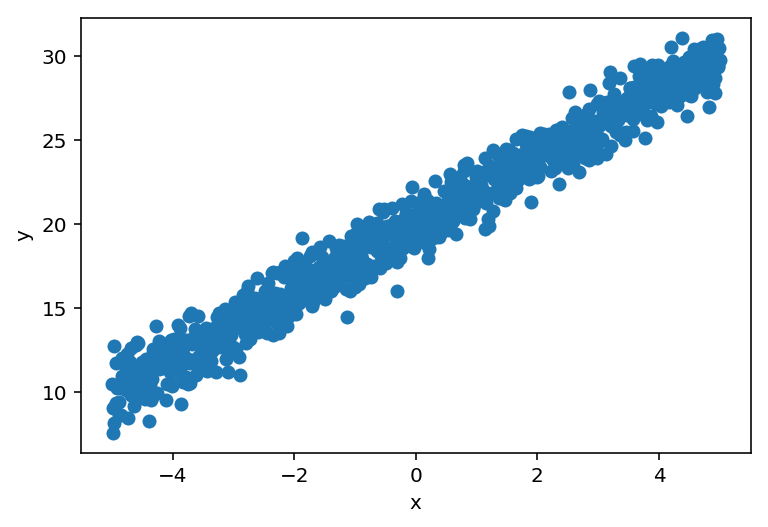

In [2]:
x = np.linspace(-5, 5, 1000)
w_true = 2  # exercise: specify ground truth w.
b_true = 20  # exercise: specify ground truth b.

def noise(n):
    return np.random.normal(size=(n))

# exercise: write the linear equation down.
y = w_true * x + b_true + noise(len(x))

# Plot ground truth data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

### Exercise

Now, let's plot what would be a very bad estimate of $w$ and $b$. 

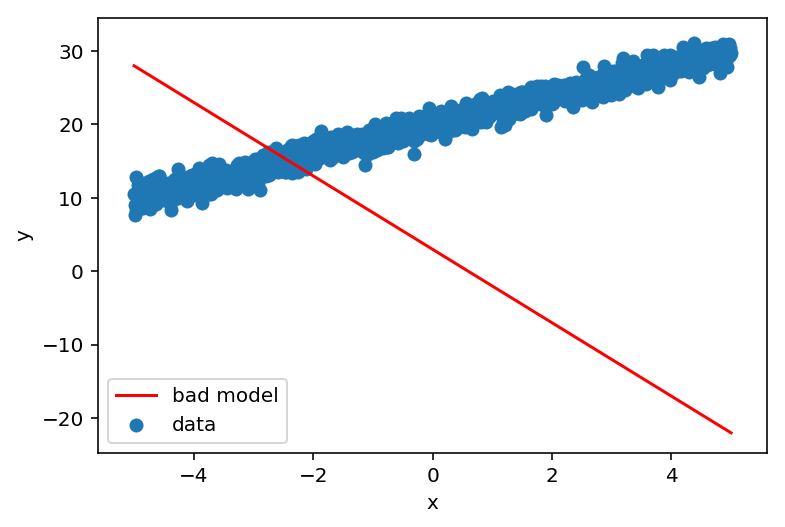

In [3]:
# Plot a very bad estimate
w = -5  # exercise: fill in a bad value for w
b = 3   # exercise: fill in a bad value for b
y_est = w * x + b  # exercise: fill in the equation.
plt.plot(x, y_est, color='red', label='bad model')
plt.scatter(x, y, label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Loss Function

How bad is our model? We can quantify this by looking at a metric called the "mean squared error". The mean squared error is defined as "the average of the sum of squared errors".

"Mean squared error" is but one of many **loss functions** that are available in deep learning frameworks. It is commonly used for regression tasks.

Loss functions are designed to quantify how bad our model is in predicting the data.

### Exercise

Let's implement the mean squared error function.

In [4]:
# Exercise: implement mean squared error function.
# It should take in 
def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

# Calculate the mean squared error between 
mse(y, y_est)

697.1616226282091

### Activity: Optimize model by hand.

Now, we're going to optimize this model by hand. Use the sliders provided to adjust the model.

In [5]:
@interact(
    w=FloatSlider(min=-10, max=10, step=0.1), 
    b=FloatSlider(min=10, max=30, step=0.1)
)
def optimize_plot(w, b):
    y_est = x * w + b
    plt.scatter(x, y, alpha=0.3, label='data')
    plt.plot(x, y_est, color='red', label='model')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.title(f'MSE: {mse(y, y_est):.02f}')

interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, min=-10.0), FloatSlider(value=10.0, de…

### Discussion

As you were optimizing the model, what did you notice about the MSE? score?

# Detour: Gradient-Based Optimization

Implicit in what you were doing was something we formally call "gradient-based optimization". This is a very important point to understand. If you get this for a linear model, you will understand how this works for more complex models. Hence, we are going to go into a small crash-course detour on what gradient-based optimization is.

## Derivatives

At the risk of ticking off mathematicians for a sloppy definition, for this workshop's purposes, a useful way of defining the derivative is:

> How much our output changes as we take a small step on the inputs, taken in the limit of going to very small steps.

If we have a function:

$$f(w) = w^2 + 3w - 5$$

What is the derivative of $f(x)$ with respect to $w$? From first-year undergraduate calculus, we should be able to calculate this:

$$f'(w) = 2w + 3$$

(We will use the apostrophe marks to indicate derivatives. 1 apostrophe mark means first derivative, 2nd apostrophe mark means 2nd derivative.)

## Minimizing $f(w)$ Analytically

What is the value of $w$ that minimizes $f(w)$? Again, from undergraduate calculus, we know that at a minima of a function (whether it is a global or local), the first derivative will be equal to zero, i.e. $f'(w) = 0$. By taking advantage of this property, we can analytically solve for the value of $w$ at the minima.

$$2w + 3 = 0$$

Hence, 

$$w = -\frac{3}{2} = 1.5$$

To check whether the value of $w$ at the place where $f'(w) = 0$ is a minima or maxima, we can use another piece of knowledge from 1st year undergraduate calculus: The sign of the second derivative will tell us whether this is a minima or maxima.

- If the second derivative is positive regardless of the value of $w$, then the point is a minima. (Smiley faces are positive!)
- If the second derivative is negative regardless of the value of $w$, then the point is a maxima. (Frowning faces are negative!)

Hence, 

$$f''(w) = 2$$

We can see that $f''(w) > 0$ for all $w$, hence the stationary point we find is going to be a local minima.

## Minimizing $f(w)$ Computationally

An alternative way of looking at this is to take advantage of $f'(w)$, the gradient, evaluated at a particular $w$. A known property of the gradient is that if you take steps in the negative direction of the gradient, you will eventually reach a function's minima. If you take small steps in the positive direction of the gradient, you will reach a function's maxima (if it exists).

### Exercise

Let's implement this using the function $f(w)$, done using NumPy.

In [6]:
# Exercise: Write f(w) as a function.
def f(w):
    return w**2 + 3 * w - 5

# Exercise: Write df(w) as a function. 
def df(w):
    """
    The derivative of f with respect to w.
    """
    return 2 * w + 3

# Exercise: Pick a number to start w at.
w = 10.0  # start with a float

# Now, adjust the value of w 1000 times, taking small steps in the negative direction of the gradient.
for i in range(1000):
    w = w - df(w) * 0.01  # 0.01 is the size of the step taken.
    
print(w)

-1.4999999806458753


Congratulations, you have just implemented **stochastic gradient descent**!

Stochastic gradient descent is an **optimization routine**: a way of programming a computer to do optimization for you so that you don't have to do it by hand.

## Minimizing $f(w)$ with `autograd`

Autograd is a Python package for automatically computing gradients. This way, we do not have to specify the gradient function by hand. With autograd, our example above is modified in only a slightly different way.

In [8]:
from autograd import grad
from tqdm import tqdm_notebook as tqdmn

def f(w):
    return w**2 + 3 * w - 5

# This is what changes: we use autograd's `grad` function to automatically return a gradient function.
df = grad(f)

# Exercise: Pick a number to start w at.
w = -10.0

# Now, adjust the value of w 1000 times, taking small steps in the negative direction of the gradient.
for i in tqdmn(range(1000)):
    w = w - df(w) * 0.01  # 0.01 is the size of the step taken.
    
print(w)


-1.5000000143052226


# Back to Optimizing Linear Regression

## Ingredients for "Optimizing" a Model

At this point, we have learned what the ingredients are for optimizing a model:

1. A model, which is a function that maps inputs $x$ to outputs $y$.
2. Parameters of the model. In our linear regression case, this is $w$ and $b$; usually, in the literature, we call this a **parameter set** $\theta$.
3. Loss function, which tells us how bad our predictions are.
4. Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.

The latter point, which is "how to adjust the parameter values to minimize the loss function", is the key point to understand here. 

## Code-Along Exercise

We are going to write code to tie this all together. In order help you follow along, I will type this in full, but you will only have to fill-in-the-blanks. 

In [12]:
# Exercise: Define the model
def model(p, x):
    """
    :param p: parameters
    :param x: data
    """
    return p['w'] * x + p['b']  # take out in student version.

# Initialize values of w and b. We will store the parameter values in a dictionary.
p = dict()
p['w'] = np.random.normal()  # FITB
p['b'] = np.random.normal()  # FITB

# This is something autograd-specific. With a deep learning framework, you do not need to know this.
# However, for the purposes of this class, you will be seeing pattern over and over. Because autograd
# by default optimizes a function w.r.t. its first argument, we can pass in all of the model parameters
# as an array of values. Flatten, thus, flattens any arbitrarily nested data structure into a numpy
# array. It returns a flat parameter array, and an unflattener function that will return the original
# data structure.
from autograd.misc import flatten
flat_p, unflattener = flatten(p)

# Differentiable loss function w.r.t. 1st argument
def mseloss(flat_p, unflattener, model, x, y):
    """
    :param flat_p: parameters to optimize
    :param unflattener: A function to unflatten the parameters into its original data structure.
    :param x: input data
    :param y: correct outputs
    """
    p = unflattener(flat_p)  # FITB
    y_est = model(p, x)      # FITB
    return mse(y, y_est)     # FITB

from autograd import elementwise_grad as egrad, grad

dmseloss = egrad(mseloss)  # derivative of loss.

# Optimization routine
losses = []
for i in tqdmn(range(2000)):
    flat_p = flat_p - dmseloss(flat_p, unflattener, model, x, y) * 0.001
    losses.append(mseloss(flat_p, unflattener, model, x, y))

Now, let's plot the loss score over time. It should be going downwards.

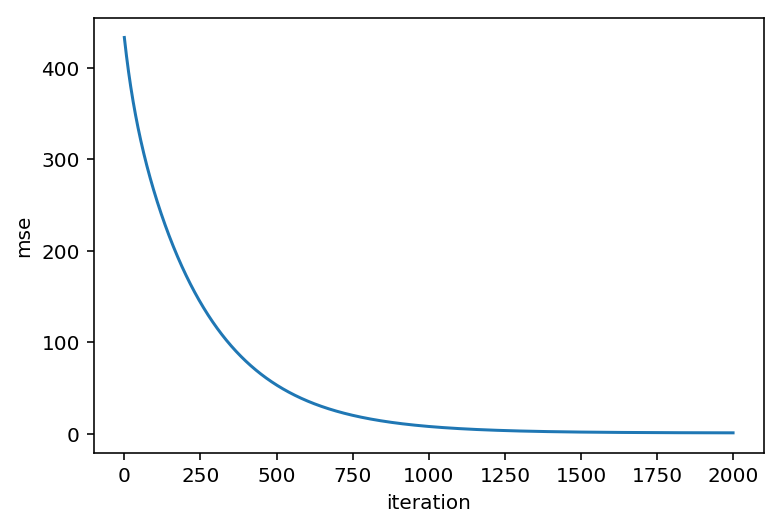

In [13]:
plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('mse')
plt.show()

In [14]:
from pprint import pprint

p = unflattener(flat_p)
pprint(p)

{'b': array(19.5965984), 'w': array(1.99571098)}


# Recap: Ingredients

1. Model specification ("equations") ($y = wx + b$)
2. Parameters of the model to be optimized ($w$ and $b$, or more generally, $p$)
3. Loss function: tells us how wrong our model parameters are w.r.t. the data ($MSE$)
4. Opitmization routine (for-loop)

# Linear Regression, Extended

Thus far, we have shown linear regression using only one-dimensional inputs (i.e. one column of data). Linear regression has been extended to higher dimensional inputs, i.e. two or more columns of data.

## In Pictures

Linear regression in one dimension looks 

# Break (10 min.)

# Logistic Regression

In [17]:
def logistic(x):
    return 1 / (1 + np.exp(-x))


@interact(
    w=FloatSlider(min=-5, max=5, step=0.1), 
    b=FloatSlider(min=-5, max=5, step=0.1)
)
def plot_logistic(w, b):
    x = np.linspace(-10, 10, 1000)
    z = w * x + b  # linear transform on x
    y = logistic(z)
    plt.plot(x, y)

interactive(children=(FloatSlider(value=0.0, description='w', max=5.0, min=-5.0), FloatSlider(value=0.0, descr…

## Make fake data

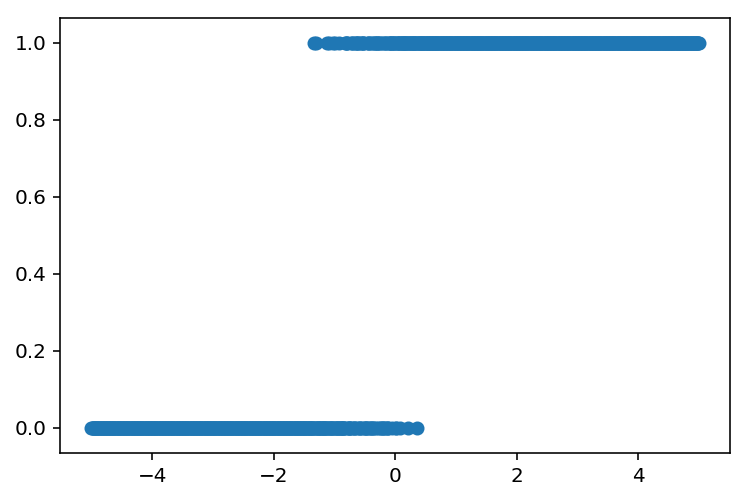

In [51]:
x = np.linspace(-5, 5, 1000)
w = 2
b = 1
z = w * x + b + np.random.normal(size=(len(x))) # Make some noisy data
y_true = np.round(logistic(z))
plt.scatter(x, y_true)

NOTE TO SELF: Define logistic loss function up-front. Explain the two components: loss for class 0 and loss for class 1. Work out on paper four scenarios: two good predictions (one per class), and two bad predictions (one per class).

Give a teaser to the class: "logistic" is an "activation" function! --> borrowed term from what computer scientists thought were how neurons were "activated".

In [58]:
def model(p, x):
    """
    Logistic regression model
    """
    w = p[0]
    b = p[1]
    z = w * x + b
    y = logistic(z)
    return y

def loss(p, x, y):
    preds = model(p, x)
    return -np.mean(y * np.log(preds) + (1 - y) * np.log(1 - preds))

dloss = egrad(loss)

p = np.random.uniform(1, 5, size=(2,))

losses = []
for i in range(2000):
    p = p - dloss(p, x, y_true) * 0.01
    losses.append(loss(p, x, y_true))

In [59]:
p

array([2.80270951, 1.52447069])

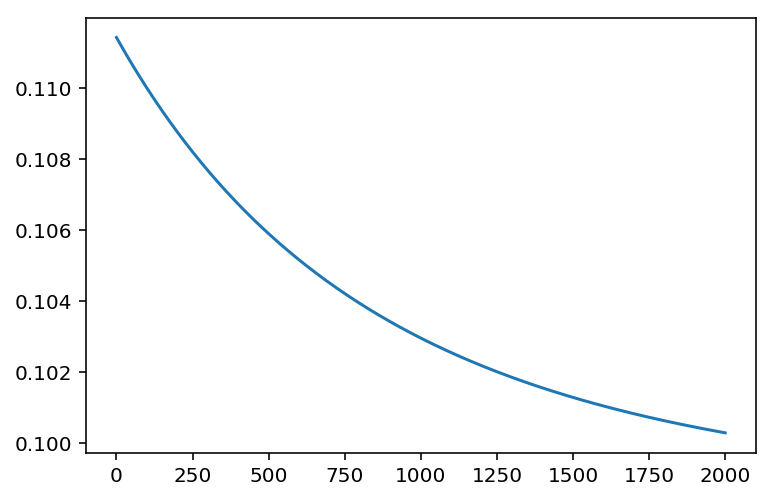

In [60]:
plt.plot(losses)

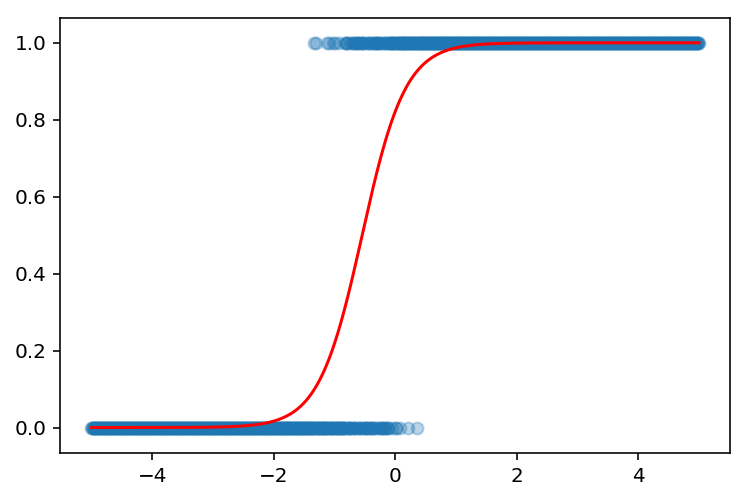

In [64]:
plt.scatter(x, y_true, alpha=0.3)
plt.plot(x, model(p, x), color='red')

# Neural Networks

Very powerful, arbitrary math equations that also take our data and map it to some output, but does so without ever knowing what the true equation form is.

That's all a neural network model is.

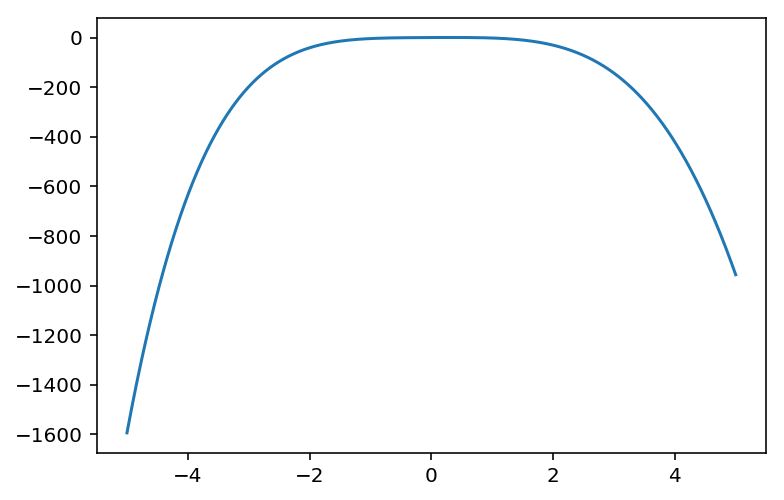

In [30]:
def true_function(x, noise=False):
    y = 0.1 * np.power(x, 5) - 2 * np.power(x, 4) + 0.01 * np.power(x, 3) - np.power(x, 2) + x
    if noise:
        y += np.random.normal(scale=1, size=(len(x)))
    return y

x = np.linspace(-5, 5, 1000).reshape(-1, 1)
y_true = true_function(x, noise=False)
plt.plot(x, y_true)

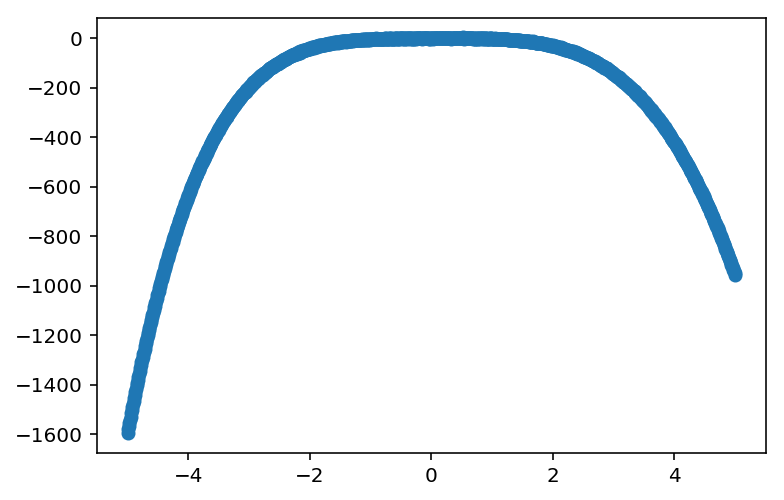

In [31]:
y_measured = true_function(x.squeeze(), noise=True)
plt.scatter(x, y_measured)

In [32]:
from tqdm import tqdm_notebook as tqdmn

In [33]:
# Parameters p
p = dict()
def noise(size):
    return np.random.normal(size=size)

# Initialize parameters
p['w1'] = noise((1, 50))
p['b1'] = noise((50,))

p['w2'] = noise((50, 20))
p['b2'] = noise((20,))

p['w3'] = noise((20, 1))
p['b3'] = noise((1,))

# Terminology to introduce:
# - "layers"
# - "activation function"
# - "deep" vs. "shallow"
# - "loss function" <> "cost function"

def model(p, x, unflattener):
    p = unflattener(p)
    # "a1" is the activation from layer 1
    a1 = np.tanh(np.dot(x, p['w1']) + p['b1'])
    # "a2" is the activation from layer 2
    a2 = np.tanh(np.dot(a1, p['w2']) + p['b2'])
    # "a3" is the activation from layer 3
    a3 = np.dot(a2, p['w3']) + p['b3']
    return a3

def loss(p, x, y, unflattener):
    preds = model(p, x, unflattener)
    return mse(y, preds)

dloss = egrad(loss)

losses = []
from autograd.misc import flatten
# This is autograd-specific
p_flat, unflattener = flatten(p)
for i in tqdmn(range(2000)):
    p_flat = p_flat - dloss(p_flat, x, y_measured, unflattener) * 0.01
    losses.append(loss(p_flat, x, y_measured, unflattener))

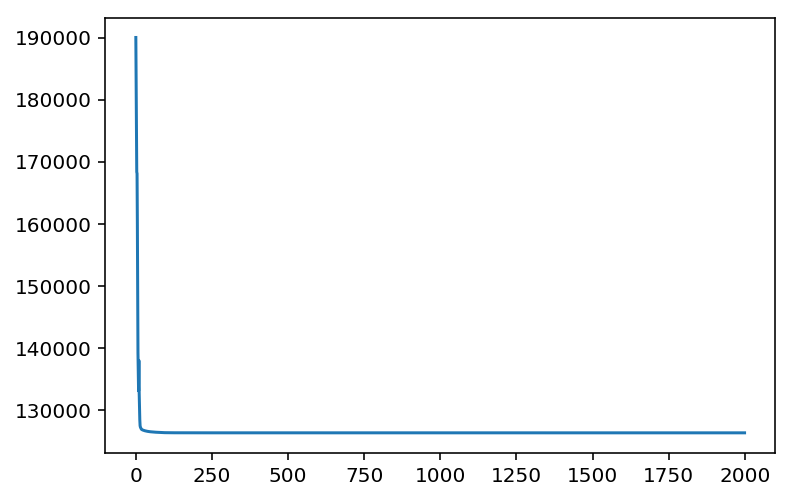

In [34]:
plt.plot(losses)

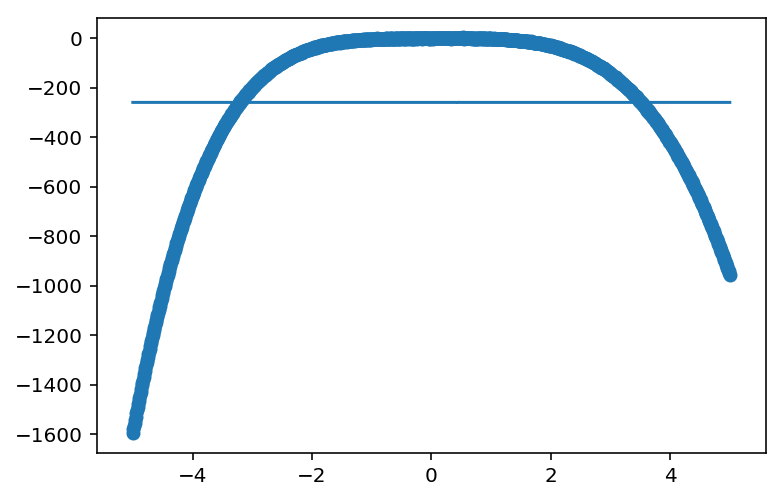

In [35]:
y_pred = model(p_flat, x, unflattener)
plt.plot(x, y_pred)
plt.scatter(x, y_measured)

Applications!

- Given X -> predict Y

Parting notes:

- Practice
- Resources